<a href="https://colab.research.google.com/github/Song-Hyunsub/Univ_Study/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98_Tensorflow%ED%9A%8C%EA%B7%80_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 회귀 문제 실습 데이터 취득

### [1] 파이썬 환경
- 필요한 패키지 : numpy, pandas, tensorflow, scikit-learn, matplotlib  
- 실행 환경 : colab  

### [2] 데이터 수집
- 문제 : wine 품질 예측 (회귀)
- 데이터 소스 : UCI Machine Learning Repository


In [1]:
import pandas as pd

In [2]:
red_wine = pd.read_csv('winequality-red.csv', sep = ';') # csv 파일에서 ; 으로 구분하는 것
white_wine = pd.read_csv('winequality-white.csv', sep = ';')

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
red_wine.insert(11, 'class', 0)
white_wine.insert(11, 'class', 1)

In [6]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5


In [7]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1,6


In [8]:
wine_df = pd.concat([red_wine, white_wine], ignore_index=True)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,7


In [ ]:
# def norm(x):
#   _max = x.max()
#   _min = x.min()
#   _denom = _max - _min
#   return (x - _min) / _denom

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
wine_df[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol']] = \
mm_scaler.fit_transform(wine_df[['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'alcohol']])

In [10]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class,quality
0,0.297521,0.70,0.00,0.019939,0.076,0.034722,0.064516,0.99780,0.612403,0.56,0.202899,0,5
1,0.330579,0.88,0.00,0.030675,0.098,0.083333,0.140553,0.99680,0.372093,0.68,0.260870,0,5
2,0.330579,0.76,0.04,0.026074,0.092,0.048611,0.110599,0.99700,0.418605,0.65,0.260870,0,5
3,0.611570,0.28,0.56,0.019939,0.075,0.055556,0.124424,0.99800,0.341085,0.58,0.260870,0,6
4,0.297521,0.70,0.00,0.019939,0.076,0.034722,0.064516,0.99780,0.612403,0.56,0.202899,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.198347,0.21,0.29,0.015337,0.039,0.079861,0.198157,0.99114,0.426357,0.50,0.463768,1,6
6493,0.231405,0.32,0.36,0.113497,0.047,0.194444,0.373272,0.99490,0.333333,0.46,0.231884,1,5
6494,0.223140,0.24,0.19,0.009202,0.041,0.100694,0.241935,0.99254,0.209302,0.46,0.202899,1,6
6495,0.140496,0.29,0.30,0.007669,0.022,0.065972,0.239631,0.98869,0.480620,0.38,0.695652,1,7


In [14]:
X = wine_df.iloc[:, :12]
y = wine_df.iloc[:, 12].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)

In [16]:
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(24, input_dim=12, activation='relu'))
model.add(layers.Dense(48, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(1)) # 회귀문제에서는 마지막을 값만 둔다.
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 48)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 12)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,113 (8.25 KB)

 Trainable params: 2,113 (8.25 KB)

 Non-trainable params: 0 (0.00 B)

## << 매우 중요 >>
dense의 param 개수 : 12(입력) * 24(출력) + 24 (편향=여기서는 출력의 개수와 같음)  
(가중치는 12 * 24)  
dense_1의 param 개수 : 24(입력) * 48(출력) + 48(편향)  
dense_2의 param 개수 : 48(입력) * 12(출력) + 12(편향)  
dense_3의 param 개수 : 12(입력) * 1(출력) + 1(편향)  

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.6610
Epoch 2/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5856
Epoch 3/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5373
Epoch 4/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5420
Epoch 5/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5321
Epoch 6/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5434
Epoch 7/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5165
Epoch 8/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5012
Epoch 9/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5116
Epoch 10/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5149
Epoch 11/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5331
Epoch 12/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5241
Epoch 13/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5277
Epoch 14/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5149
Epoch 15/50
488/488 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - lo

In [20]:
target_qualities = []
prediction_qualities = []
x_tick=[]

counter = 0

y_prediction = model.predict(X_test).flatten()
for i in range(50):
  target = y_test[i]
  prediction = y_prediction[i]
  print('실제 품질: {:.2f}, 예측 품질: {:.2f}'.format(target, prediction))
  target_qualities.append(target)
  prediction_qualities.append(prediction)
  counter += 1
  x_tick.append(counter)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
실제 품질: 6.00, 예측 품질: 5.56
실제 품질: 6.00, 예측 품질: 6.17
실제 품질: 5.00, 예측 품질: 5.61
실제 품질: 5.00, 예측 품질: 5.30
실제 품질: 5.00, 예측 품질: 5.59
실제 품질: 6.00, 예측 품질: 5.61
실제 품질: 5.00, 예측 품질: 5.53
실제 품질: 5.00, 예측 품질: 5.49
실제 품질: 5.00, 예측 품질: 5.39
실제 품질: 6.00, 예측 품질: 6.05
실제 품질: 6.00, 예측 품질: 5.52
실제 품질: 7.00, 예측 품질: 5.67
실제 품질: 8.00, 예측 품질: 6.70
실제 품질: 6.00, 예측 품질: 5.35
실제 품질: 4.00, 예측 품질: 5.12
실제 품질: 5.00, 예측 품질: 5.40
실제 품질: 5.00, 예측 품질: 5.48
실제 품질: 6.00, 예측 품질: 6.24
실제 품질: 5.00, 예측 품질: 5.18
실제 품질: 5.00, 예측 품질: 5.19
실제 품질: 7.00, 예측 품질: 6.44
실제 품질: 7.00, 예측 품질: 5.92
실제 품질: 7.00, 예측 품질: 6.89
실제 품질: 5.00, 예측 품질: 5.55
실제 품질: 6.00, 예측 품질: 6.84
실제 품질: 5.00, 예측 품질: 5.93
실제 품질: 6.00, 예측 품질: 6.65
실제 품질: 6.00, 예측 품질: 6.03
실제 품질: 6.00, 예측 품질: 6.41
실제 품질: 7.00, 예측 품질: 6.08
실제 품질: 5.00, 예측 품질: 5.66
실제 품질: 5.00, 예측 품질: 5.08
실제 품질: 5.00, 예측 품질: 5.65
실제 품질: 6.00, 예측 품질: 7.03
실제 품질: 5.00, 예측 품질: 5.36
실제 품질: 6.00, 예측 품질: 5.33
실제 품질: 6.00, 예측 품질: 6.71
실제 품질: 5.00, 예측 품질: 5.51
실제 품질: 5.00

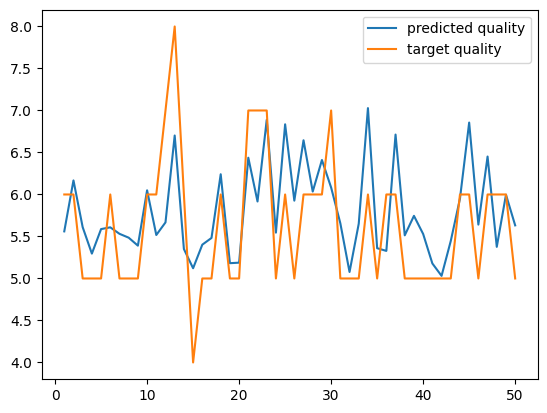

In [23]:
import matplotlib.pyplot as plt
plt.plot(x_tick, prediction_qualities, label='predicted quality')
plt.plot(x_tick, target_qualities, label='target quality')
plt.legend()
plt.show()